In [ ]:
# Import basic libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import sklearn.preprocessing as skp
import sklearn.model_selection as skm
import os
#import classification modules
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
# first neural network with keras tutorial
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, roc_auc_score,roc_curve, auc, f1_score 

In [ ]:
df = pd.read_csv("hepatitis.csv")

In [ ]:
print("Shape is :", df.shape)
display(df.dtypes)

Shape is : (142, 20)


class               int64
age                 int64
sex                 int64
steroid             int64
antivirals          int64
fatigue             int64
malaise             int64
anorexia            int64
liver_big           int64
liver_firm          int64
spleen_palable      int64
spiders             int64
ascites             int64
varices             int64
bilirubin         float64
alk_phosphate       int64
sgot                int64
albumin           float64
protime             int64
histology           int64
dtype: object

In [ ]:
df.isnull().sum()

class             0
age               0
sex               0
steroid           0
antivirals        0
fatigue           0
malaise           0
anorexia          0
liver_big         0
liver_firm        0
spleen_palable    0
spiders           0
ascites           0
varices           0
bilirubin         0
alk_phosphate     0
sgot              0
albumin           0
protime           0
histology         0
dtype: int64

In [ ]:
df.head(5)

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1


In [ ]:
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [ ]:
df.describe()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,1.816901,40.816901,1.105634,1.514085,1.838028,1.359155,1.619718,1.795775,1.823944,1.584507,1.809859,1.669014,1.880282,1.880282,1.382958,105.647887,83.507042,3.830493,61.704225,1.443662
std,0.388116,12.189182,0.308456,0.501571,0.369729,0.481451,0.487174,0.404561,0.382216,0.494551,0.393801,0.472234,0.325781,0.325781,1.166526,47.375099,82.417700,0.618103,17.696732,0.498575
min,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.300000,26.000000,14.000000,2.100000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,78.500000,32.250000,3.500000,56.250000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,100.000000,58.000000,3.900000,61.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.480000,119.750000,99.500000,4.200000,66.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


In [ ]:
# converting age to categorical data for better analysis 
df['age']  = np.where((df['age'] <18) ,'Teenager',
                               np.where((df['age'] >=18) & (df['age'] <=25),'Young',
                                np.where((df['age'] >=25) & (df['age'] <=40),'Adult',
                               'Old')))

In [ ]:
df['age'].value_counts()

Old         65
Adult       63
Young       13
Teenager     1
Name: age, dtype: int64

In [ ]:
df.columns


Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [ ]:
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,Adult,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,2,Old,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,2,Old,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,2,Adult,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1
4,2,Adult,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1


In [ ]:
df['bilirubin'].head()

0    1.0
1    0.9
2    0.7
3    1.0
4    0.9
Name: bilirubin, dtype: float64

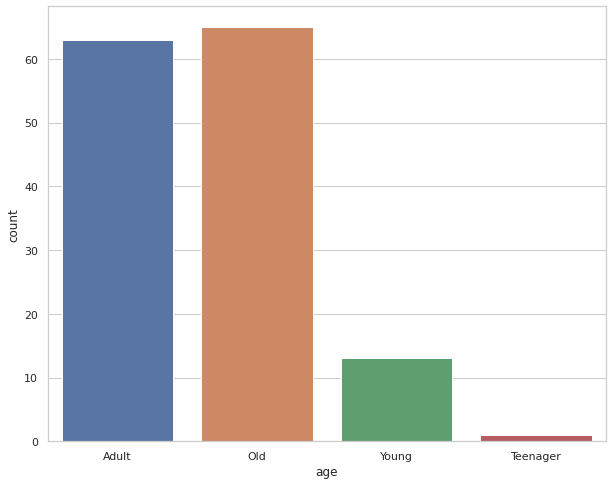

In [ ]:
# from matplotlib import rcParams
# figure size in inches
# rcParams['figure.figsize'] = 11.7,8.27
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style("whitegrid")
sns.countplot(x="age", data=df)

In [ ]:
df['sex'].value_counts()

1    127
2     15
Name: sex, dtype: int64

In [ ]:
df.head(5)

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,Adult,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,2,Old,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,2,Old,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,2,Adult,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1
4,2,Adult,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   class           142 non-null    int64  
 1   age             142 non-null    object 
 2   sex             142 non-null    int64  
 3   steroid         142 non-null    int64  
 4   antivirals      142 non-null    int64  
 5   fatigue         142 non-null    int64  
 6   malaise         142 non-null    int64  
 7   anorexia        142 non-null    int64  
 8   liver_big       142 non-null    int64  
 9   liver_firm      142 non-null    int64  
 10  spleen_palable  142 non-null    int64  
 11  spiders         142 non-null    int64  
 12  ascites         142 non-null    int64  
 13  varices         142 non-null    int64  
 14  bilirubin       142 non-null    float64
 15  alk_phosphate   142 non-null    int64  
 16  sgot            142 non-null    int64  
 17  albumin         142 non-null    flo

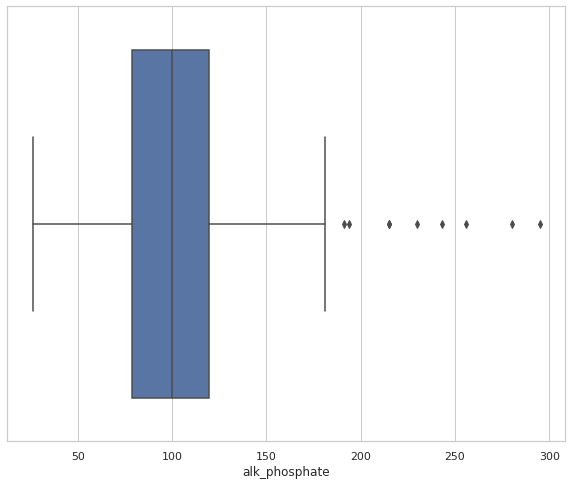

In [ ]:
sns.boxplot(x ='alk_phosphate', data=df)

In [ ]:
from scipy import stats 

In [ ]:
df['alk_phosphate']  = (df.alk_phosphate - df.alk_phosphate.min()) / (df.alk_phosphate.max() - df.alk_phosphate.min())

In [ ]:
df.alk_phosphate=df.alk_phosphate.round(2)

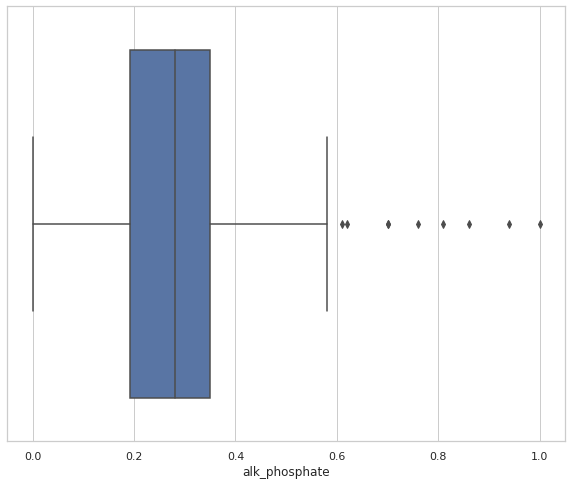

In [ ]:
sns.boxplot(x ='alk_phosphate', data=df)

In [ ]:
df['age'] = pd.Categorical(df['age'])

In [ ]:
dfDummies = pd.get_dummies(df['age'], prefix = 'age')

In [ ]:
df = pd.concat([df, dfDummies], axis=1)

In [ ]:
df.head(5)

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,...,bilirubin,alk_phosphate,sgot,albumin,protime,histology,age_Adult,age_Old,age_Teenager,age_Young
0,2,Adult,2,1,2,2,2,2,1,2,...,1.0,0.22,18,4.0,61,1,1,0,0,0
1,2,Old,1,1,2,1,2,2,1,2,...,0.9,0.41,42,3.5,61,1,0,1,0,0
2,2,Old,1,2,2,1,2,2,2,2,...,0.7,0.26,32,4.0,61,1,0,1,0,0
3,2,Adult,1,2,2,2,2,2,2,2,...,1.0,0.29,200,4.0,61,1,1,0,0,0
4,2,Adult,1,2,2,2,2,2,2,2,...,0.9,0.26,28,4.0,75,1,1,0,0,0


In [ ]:
del df['age']

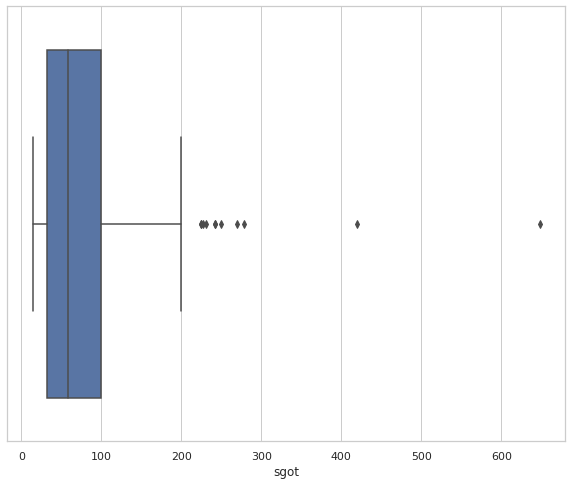

In [ ]:
sns.boxplot(x ='sgot', data=df)

In [ ]:
df['sgot']  = (df.sgot - df.sgot.min()) / (df.sgot.max() - df.sgot.min())

In [ ]:
df.sgot=df.sgot.round(2)

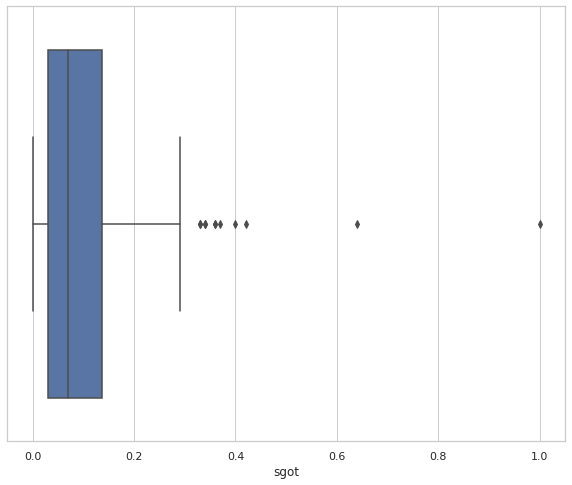

In [ ]:
sns.boxplot(x ='sgot', data=df)

In [ ]:
df['bilirubin']  = (df.bilirubin - df.bilirubin.min()) / (df.bilirubin.max() - df.bilirubin.min())

In [ ]:
df.bilirubin=df.bilirubin.round(2)

In [ ]:
df['protime']  = (df.protime - df.protime.min()) / (df.protime.max() - df.protime.min())
df.protime=df.protime.round(2)

In [ ]:
df['albumin']  = (df.albumin - df.albumin.min()) / (df.albumin.max() - df.albumin.min())
df.albumin=df.albumin.round(2)

In [ ]:
dfDummies = pd.get_dummies(df['sex'], prefix = 'sex')

In [ ]:
df = pd.concat([df, dfDummies], axis=1)

In [ ]:
del df['sex'];

In [ ]:
dfDummies = pd.get_dummies(df['steroid'], prefix = 'steroid')
df = pd.concat([df, dfDummies], axis=1)
del df['steroid'];

In [ ]:
dfDummies = pd.get_dummies(df['antivirals'], prefix = 'antivirals')
df = pd.concat([df, dfDummies], axis=1)
del df['antivirals'];

In [ ]:
dfDummies = pd.get_dummies(df['fatigue'], prefix = 'fatigue')
df = pd.concat([df, dfDummies], axis=1)
del df['fatigue'];

In [ ]:
dfDummies = pd.get_dummies(df['malaise'], prefix = 'malaise')
df = pd.concat([df, dfDummies], axis=1)
del df['malaise'];

In [ ]:
dfDummies = pd.get_dummies(df['anorexia'], prefix = 'anorexia')
df = pd.concat([df, dfDummies], axis=1)
del df['anorexia'];

In [ ]:
dfDummies = pd.get_dummies(df['spleen_palable'], prefix = 'spleen_palable')
df = pd.concat([df, dfDummies], axis=1)
del df['spleen_palable'];

In [ ]:
dfDummies = pd.get_dummies(df['liver_big'], prefix = 'liver_big')
df = pd.concat([df, dfDummies], axis=1)
del df['liver_big'];

In [ ]:
dfDummies = pd.get_dummies(df['liver_firm'], prefix = 'liver_firm')
df = pd.concat([df, dfDummies], axis=1)
del df['liver_firm'];

In [ ]:
dfDummies = pd.get_dummies(df['spiders'], prefix = 'spiders')
df = pd.concat([df, dfDummies], axis=1)
del df['spiders'];

In [ ]:
dfDummies = pd.get_dummies(df['ascites'], prefix = 'ascites')
df = pd.concat([df, dfDummies], axis=1)
del df['ascites'];

In [ ]:
dfDummies = pd.get_dummies(df['varices'], prefix = 'varices')
df = pd.concat([df, dfDummies], axis=1)
del df['varices'];

In [ ]:
df["class"].replace((1,2),(0,1),inplace=True)

In [ ]:
df["class"]=df["class"].astype("bool")

In [ ]:
df.describe()

,bilirubin,alk_phosphate,sgot,albumin,protime,histology,age_Adult,age_Old,age_Teenager,age_Young,...,liver_big_1,liver_big_2,liver_firm_1,liver_firm_2,spiders_1,spiders_2,ascites_1,ascites_2,varices_1,varices_2
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,...,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,0.140493,0.295563,0.109859,0.402958,0.617042,1.443662,0.443662,0.457746,0.007042,0.091549,...,0.176056,0.823944,0.415493,0.584507,0.330986,0.669014,0.119718,0.880282,0.119718,0.880282
std,0.151888,0.176312,0.129724,0.143214,0.176967,0.498575,0.498575,0.499975,0.083918,0.289410,...,0.382216,0.382216,0.494551,0.494551,0.472234,0.472234,0.325781,0.325781,0.325781,0.325781
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.050000,0.192500,0.030000,0.330000,0.562500,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,0.090000,0.280000,0.070000,0.420000,0.610000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,0.157500,0.350000,0.137500,0.490000,0.660000,2.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.dtypes

class                  bool
bilirubin           float64
alk_phosphate       float64
sgot                float64
albumin             float64
protime             float64
histology             int64
age_Adult             uint8
age_Old               uint8
age_Teenager          uint8
age_Young             uint8
sex_1                 uint8
sex_2                 uint8
steroid_1             uint8
steroid_2             uint8
antivirals_1          uint8
antivirals_2          uint8
fatigue_1             uint8
fatigue_2             uint8
malaise_1             uint8
malaise_2             uint8
anorexia_1            uint8
anorexia_2            uint8
spleen_palable_1      uint8
spleen_palable_2      uint8
liver_big_1           uint8
liver_big_2           uint8
liver_firm_1          uint8
liver_firm_2          uint8
spiders_1             uint8
spiders_2             uint8
ascites_1             uint8
ascites_2             uint8
varices_1             uint8
varices_2             uint8
dtype: object

In [ ]:
# data[data.columns[:]].corr()['class'][:].sort_values(ascending=False)[:50]
corrr_matrix = df[df.columns[:]].corr()['class'][:].sort_values(ascending=False)
# display(corrr_matrix)
top_10_features = corrr_matrix.index[:11]
top_10_features
# sns.heatmap(corrr_matrix[:16], annot=True, cmap='vlag')

Index(['class', 'ascites_2', 'albumin', 'spiders_2', 'varices_2', 'malaise_2',
       'protime', 'fatigue_2', 'spleen_palable_2', 'anorexia_2', 'sex_2'],
      dtype='object')

In [ ]:
corr_matrix = df[top_10_features].corr()
corr_matrix.rename(columns = {'sex_2':'gender'}, inplace = True)
corr_matrix

,class,ascites_2,albumin,spiders_2,varices_2,malaise_2,protime,fatigue_2,spleen_palable_2,anorexia_2,gender
class,1.000000,0.498499,0.453842,0.402217,0.386317,0.341807,0.298737,0.278514,0.188224,0.166678,0.162705
ascites_2,0.498499,1.000000,0.554875,0.293804,0.398588,0.336718,0.287823,0.276079,0.042434,0.189854,0.126740
albumin,0.453842,0.554875,1.000000,0.293523,0.352703,0.298824,0.294454,0.292033,0.189869,0.174526,0.033014
spiders_2,0.402217,0.293804,0.293523,1.000000,0.386004,0.343011,0.238556,0.370594,0.269376,0.311883,-0.050403
varices_2,0.386317,0.398588,0.352703,0.386004,1.000000,0.202660,0.250918,0.185645,0.208278,0.189854,0.056163
malaise_2,0.341807,0.336718,0.298824,0.343011,0.202660,1.000000,0.183469,0.586435,0.027075,0.610718,-0.013959
protime,0.298737,0.287823,0.294454,0.238556,0.250918,0.183469,1.000000,0.194021,0.108906,0.029146,-0.011126
fatigue_2,0.278514,0.276079,0.292033,0.370594,0.185645,0.586435,0.194021,1.000000,0.175707,0.379249,-0.066254
spleen_palable_2,0.188224,0.042434,0.189869,0.269376,0.208278,0.027075,0.108906,0.175707,1.000000,0.066147,-0.067021
anorexia_2,0.166678,0.189854,0.174526,0.311883,0.189854,0.610718,0.029146,0.379249,0.066147,1.000000,0.003602


In [ ]:
top_5_features = corrr_matrix.index[1:6]

In [ ]:
top_5_features = list(top_5_features)
top_5_df = df[top_5_features]

In [ ]:
corr = df.corr()
top_5_df = corr.iloc[:,1:6]
# top_5_df

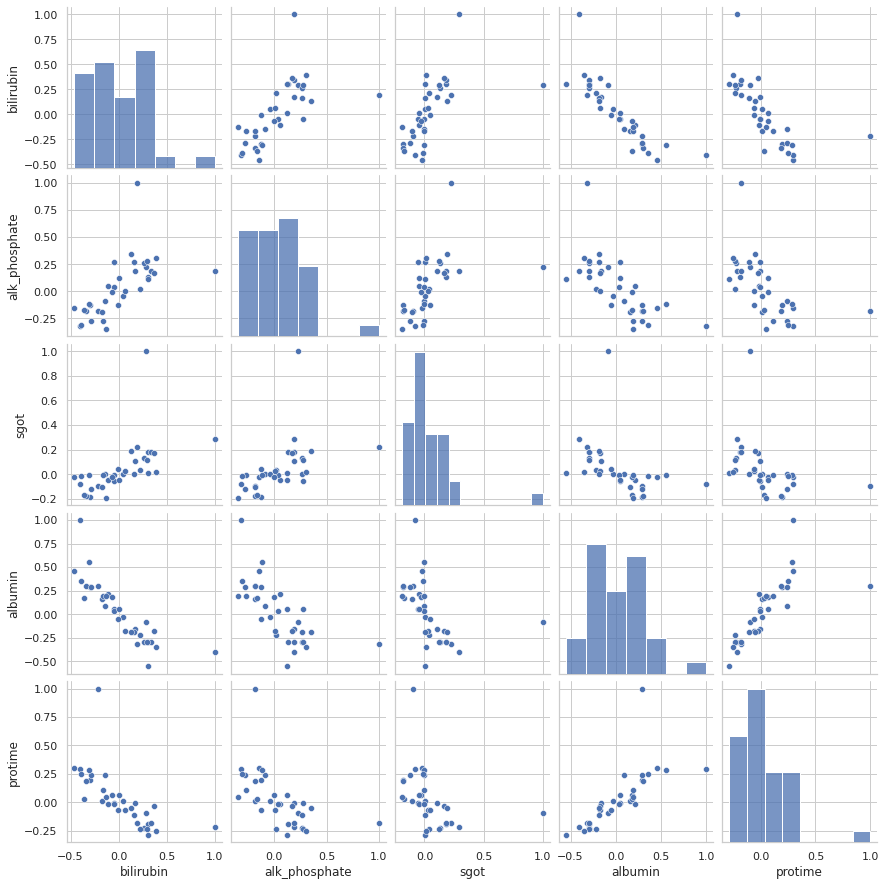

In [ ]:
sns.pairplot(top_5_df)

In [ ]:
corr_matrix.rename({'sex_2':'gender'},  inplace = True)

In [ ]:
type(corr)

pandas.core.frame.DataFrame

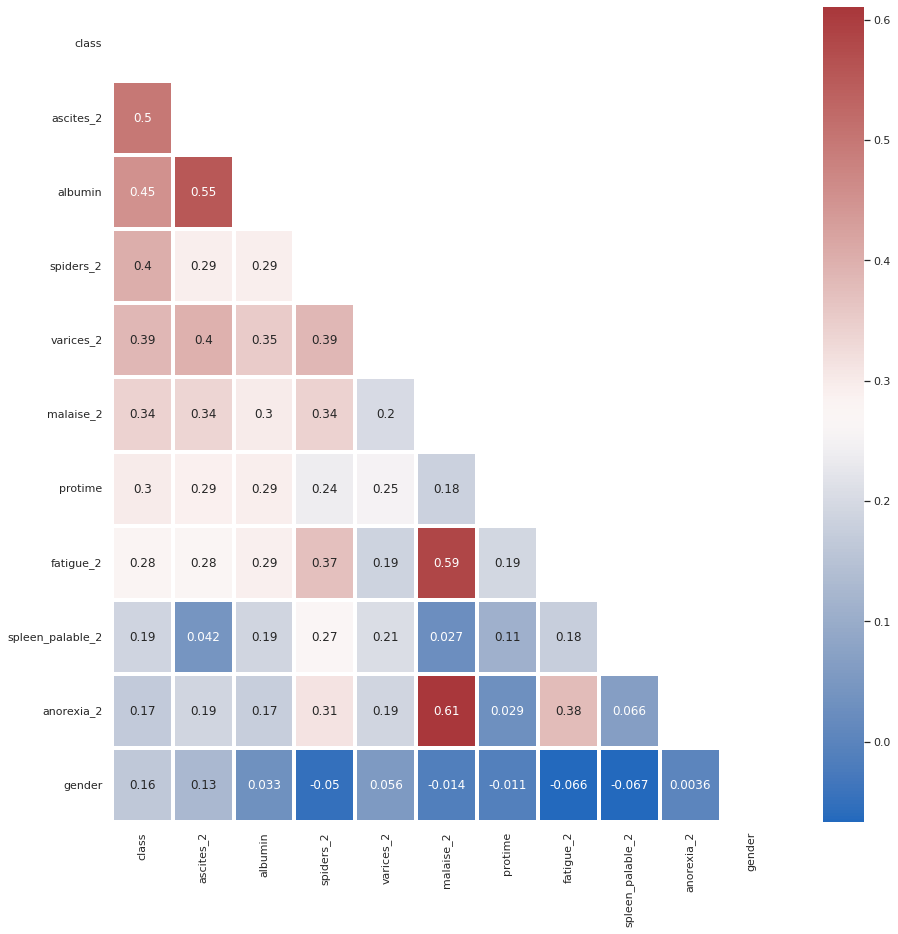

In [ ]:
plt.figure(figsize=(15,15))
# plt.rcParams.update({'font.size': 18})
# rankings_pd.rename(columns = {'test':'TEST'}, inplace = True)
type(corrr_matrix)
mask = np.triu(corr_matrix)
# mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, cmap='vlag', mask = mask, linewidths=3)
# plt.savefig('correlation_matrix.png')
# plt.show

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

# Load classification dataset
y = df['class'].copy()
X = df.drop('class',axis=1)
estimator = RandomForestClassifier()
cv = StratifiedKFold(5)
visualizer = RFECV(estimator, cv=cv, scoring='f1_weighted')
visualizer.fit(X, y)        # Fit the data to the visualizer
# visualizer.show()           # Finalize and render the figure

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(), scoring='f1_weighted')

In [ ]:
# print summaries for the selection of attributes
print(visualizer.support_)
print(visualizer.ranking_)
#storing index of the false columns
cols=[index for index,value in enumerate(visualizer.support_) if value == False] 
print(cols)
features= X.columns
print(features)

[ True  True  True  True  True False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False  True  True False False]
[ 1  1  1  1  1  8 20  9 27 25 22 23 16 21 26 24 17 19  4 11 15 13  7 14
 18 12 10  5  1  3  1  1  6  2]
[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 32, 33]
Index(['bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime', 'histology',
       'age_Adult', 'age_Old', 'age_Teenager', 'age_Young', 'sex_1', 'sex_2',
       'steroid_1', 'steroid_2', 'antivirals_1', 'antivirals_2', 'fatigue_1',
       'fatigue_2', 'malaise_1', 'malaise_2', 'anorexia_1', 'anorexia_2',
       'spleen_palable_1', 'spleen_palable_2', 'liver_big_1', 'liver_big_2',
       'liver_firm_1', 'liver_firm_2', 'spiders_1', 'spiders_2', 'ascites_1',
       'ascites_2', 'varices_1', 'varices_2'],
      dtype='object')


In [ ]:
sorted_features=pd.DataFrame(list(zip(features,visualizer.support_))).sort_values(by=1,ascending=False)
print(sorted_features)

                   0      1
0          bilirubin   True
31         ascites_2   True
1      alk_phosphate   True
30         ascites_1   True
28         spiders_1   True
4            protime   True
3            albumin   True
2               sgot   True
32         varices_1  False
29         spiders_2  False
19         malaise_2  False
27      liver_firm_2  False
26      liver_firm_1  False
25       liver_big_2  False
24       liver_big_1  False
23  spleen_palable_2  False
22  spleen_palable_1  False
21        anorexia_2  False
20        anorexia_1  False
17         fatigue_2  False
18         malaise_1  False
16         fatigue_1  False
15      antivirals_2  False
14      antivirals_1  False
13         steroid_2  False
12         steroid_1  False
11             sex_2  False
10             sex_1  False
9          age_Young  False
8       age_Teenager  False
7            age_Old  False
6          age_Adult  False
5          histology  False
33         varices_2  False


In [ ]:
#dropping faetures that are not that informative column index starts from zero index
X_after_dropping = X.drop(X.columns[cols],axis=1)
print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)
features_orig= X.columns
features_select=X_after_dropping.columns
print(features_select)

Shape of X:  (142, 34)
Shape of y:  (142,)
Index(['bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime', 'spiders_1',
       'ascites_1', 'ascites_2'],
      dtype='object')


In [ ]:
X_after_dropping.head()

,bilirubin,alk_phosphate,sgot,albumin,protime,spiders_1,ascites_1,ascites_2
0,0.09,0.22,0.01,0.44,0.61,0,0,1
1,0.08,0.41,0.04,0.33,0.61,0,0,1
2,0.05,0.26,0.03,0.44,0.61,0,0,1
3,0.09,0.29,0.29,0.44,0.61,0,0,1
4,0.08,0.26,0.02,0.44,0.75,0,0,1


In [ ]:
#create train-test split parts for manual split
trainX, testX, trainy, testy= skm.train_test_split(X_after_dropping, y, test_size=0.25, random_state=99)
print("\n Shape of train split: ")
print(trainX.shape, trainy.shape)
print("\n Shape of test split: ")
print(testX.shape, testy.shape)


 Shape of train split: 
(106, 8) (106,)

 Shape of test split: 
(36, 8) (36,)


In [ ]:
# Random Forest
clf = RandomForestClassifier(n_estimators=50)
clf.fit(trainX,trainy)

predictions = clf.predict(testX)

acc_RF = accuracy_score(testy, predictions)*100
print('Accuracy of Random Forest (%): \n',acc_RF)
      

fpr1 , tpr1, _ = roc_curve(testy, predictions)
auc_RF = auc(fpr1, tpr1)*100
print("AUC of Random Forest (%): \n", auc_RF)

pre_RF = precision_score(testy,predictions)
print('Precision Score (%): \n',pre_RF )
rec_RF = recall_score(testy,predictions)
print('Recall Score (%): \n', rec_RF)

Accuracy of Random Forest (%): 
 80.55555555555556
AUC of Random Forest (%): 
 60.83743842364531
Precision Score (%): 
 0.84375
Recall Score (%): 
 0.9310344827586207


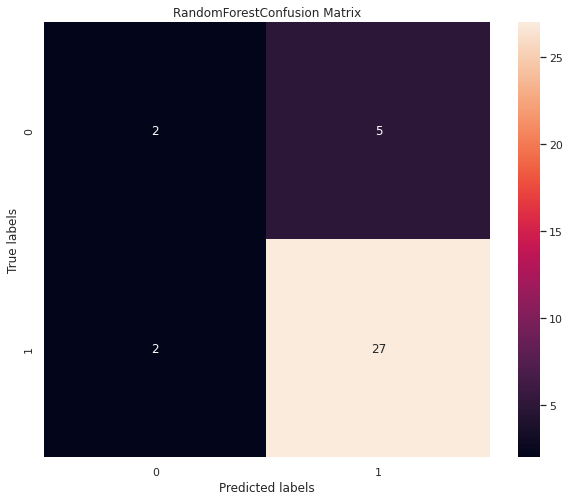

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
# ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
cm = confusion_matrix(testy, predictions)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('RandomForestConfusion Matrix'); 

In [ ]:
mlp_gs = MLPClassifier(max_iter=200)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf.fit(trainX,trainy)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [ ]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'adam'}


In [ ]:

clf = MLPClassifier(solver='lbfgs',hidden_layer_sizes=20,batch_size=200,max_iter=200, random_state=1)
clf.fit(trainX,trainy)
predictions = clf.predict(testX)

acc_NN = accuracy_score(testy, predictions)*100
print('Accuracy of MLP/Neural Network (%): \n',acc_NN)
      

fpr2 , tpr2, _ = roc_curve(testy, predictions)
auc_NN = auc(fpr2, tpr2)*100
print("AUC of MLP/Neural Network (%): \n", auc_NN)

pre_NN = precision_score(testy,predictions)
print('Precision Score (%): \n',pre_NN )
rec_NN = recall_score(testy,predictions)
print('Recall Score (%): \n', rec_NN)

Accuracy of MLP/Neural Network (%): 
 83.33333333333334
AUC of MLP/Neural Network (%): 
 67.98029556650246
Precision Score (%): 
 0.8709677419354839
Recall Score (%): 
 0.9310344827586207


In [ ]:
predictions[0]

True

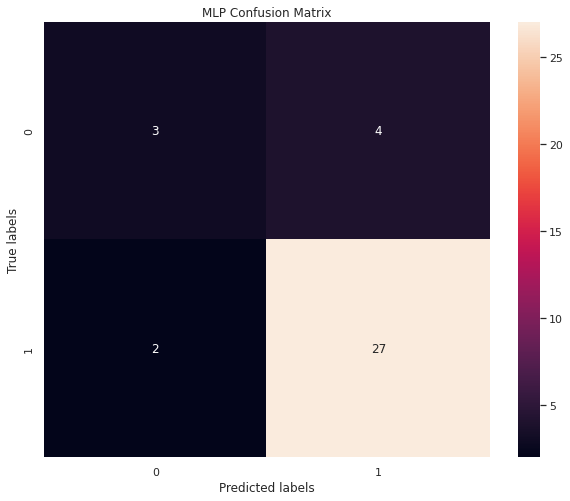

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
# ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
cm = confusion_matrix(testy, predictions)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('MLP Confusion Matrix'); 

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 144
import sklearn.preprocessing as skp
import sklearn.model_selection as skm

# import classificaiton modules

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, roc_auc_score, roc_curve, auc, f1_score

In [ ]:
# K- NN on nanual Split

clf = KNeighborsClassifier(n_neighbors=20)
clf.fit(trainX,trainy)
predictions = clf.predict(testX)

acc_K_NN = accuracy_score(testy, predictions)*100
print('Accuracy of KNN (%): \n',acc_K_NN)
      

fpr3 , tpr3, _ = roc_curve(testy, predictions)
auc_KNN = auc(fpr3, tpr3)*100
print("AUC of KNN (%): \n", auc_KNN)

pre_KNN = precision_score(testy,predictions)
print('Precision Score (%): \n',pre_KNN )
rec_KNN = recall_score(testy,predictions)
print('Recall Score (%): \n', rec_KNN)


Accuracy of KNN (%): 
 80.55555555555556
AUC of KNN (%): 
 60.83743842364531
Precision Score (%): 
 0.84375
Recall Score (%): 
 0.9310344827586207


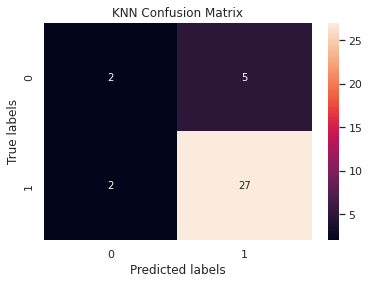

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
# ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
cm = confusion_matrix(testy, predictions)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('KNN Confusion Matrix'); 

In [ ]:
algos=["Random Forest","MLP/Neural Network","K Nearest Neighbor"]
acc=[acc_RF,acc_NN,acc_K_NN]
auc=[auc_RF,auc_NN,auc_KNN]
recall=[pre_RF,pre_NN,pre_KNN]
prec=[rec_RF,rec_NN,rec_KNN]
comp={"Algorithms":algos,"Accuracies":acc,"Area Under the Curve":auc,"Recall":recall,"Precision":prec}
compdf=pd.DataFrame(comp)
display(compdf.sort_values(by=["Accuracies","Area Under the Curve","Recall","Precision"], ascending=False))

,Algorithms,Accuracies,Area Under the Curve,Recall,Precision
1,MLP/Neural Network,83.333333,67.980296,0.870968,0.931034
0,Random Forest,80.555556,60.837438,0.843750,0.931034
2,K Nearest Neighbor,80.555556,60.837438,0.843750,0.931034


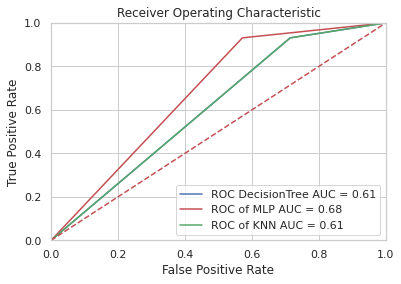

In [ ]:
import sklearn.metrics as metrics
roc_auc1 = metrics.auc(fpr1, tpr1)
roc_auc2 = metrics.auc(fpr2, tpr2)
roc_auc3 = metrics.auc(fpr3, tpr3)
# method I: plt
import matplotlib.pyplot as plt
plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'ROC DecisionTree AUC = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'r', label = 'ROC of MLP AUC = %0.2f' % roc_auc2)
plt.plot(fpr3, tpr3, 'g', label = 'ROC of KNN AUC = %0.2f' % roc_auc3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# blending ensemble for classification using hard voting
from numpy import hstack
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=10000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
	return X, y

# get a list of base models
def get_models():
  models = list()
  models.append(('lr', LogisticRegression()))
  models.append(('knn', KNeighborsClassifier()))
  models.append(('cart', DecisionTreeClassifier()))
  models.append(('svm', SVC()))
  models.append(('bayes', GaussianNB()))
  return models

# fit the blending ensemble
def fit_ensemble(models, X_train, X_val, y_train, y_val):
  # fit all models on the training set and predict on hold out set
  meta_X = list()
  for name, model in models:
    # fit in training set
    model.fit(X_train, y_train)
    # predict on hold out set
    yhat = model.predict(X_val)
    # reshape predictions into a matrix with one column
    yhat = yhat.reshape(len(yhat), 1)
    # store predictions as input for blending
    meta_X.append(yhat)
  # create 2d array from predictions, each set is an input feature
  meta_X = hstack(meta_X)
  print(meta_X)
  # define blending model
  blender = LogisticRegression()
  # fit on predictions from base models
  blender.fit(meta_X, y_val)
  return blender

# make a prediction with the blending ensemble
def predict_ensemble(models, blender, X_test):
  # make predictions with base models
  meta_X = list()
  for name, model in models:
    # predict with base model
    yhat = model.predict(X_test)
    # reshape predictions into a matrix with one column
    yhat = yhat.reshape(len(yhat), 1)
    # store prediction
    meta_X.append(yhat)
  # create 2d array from predictions, each set is an input feature
  meta_X = hstack(meta_X)
  # predict
  return blender.predict(meta_X)

# define dataset
# X, y = get_dataset()
# split dataset into train and test sets
# X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
# split training set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(trainX, trainy, test_size=0.33, random_state=1)
# trainX, testX, trainy, testy
# summarize data split
print('Train: %s, Val: %s, Test: %s' % (X_train.shape, X_val.shape, testX.shape))
# create the base models
models = get_models()
# train the blending ensemble
blender = fit_ensemble(models, X_train, X_val, y_train, y_val)
# make predictions on test set
yhat = predict_ensemble(models, blender, testX)
# evaluate predictions
score = accuracy_score(testy, yhat)
print('Blending Accuracy: %.3f' % (score*100))

Train: (71, 8), Val: (35, 8), Test: (36, 8)
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True False  True  True False]
 [ True  True  True  True  True]
 [ True False False False False]
 [ True  True False  True  True]
 [False False False False False]
 [ True  True  True  True False]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [False False  True False False]
 [ True  True False  True False]
 [ True  True  True  True  True]
 [ True  True  True  True  True]

>knn -0.164 (0.070)
>cart -0.207 (0.115)
>svm -0.169 (0.060)
>hybrid -0.183 (0.058)


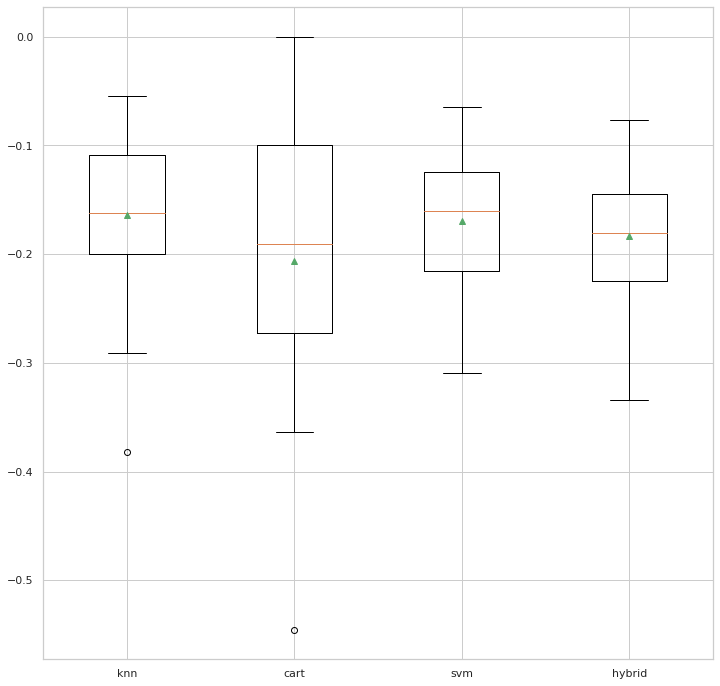

In [95]:
# compare ensemble to each standalone models for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)
	return X, y

# get a stacking ensemble of models
def get_stacking():
  # define the base models
  level0 = list()
  level0.append(('knn', KNeighborsRegressor()))
  level0.append(('cart', DecisionTreeRegressor()))
  level0.append(('svm', SVR()))
  # define meta learner model
  level1 = LinearRegression()
  # define the stacking ensemble
  model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
  return model

# get a list of models to evaluate
def get_models():
  models = dict()
  models['knn'] = KNeighborsRegressor()
  models['cart'] = DecisionTreeRegressor()
  models['svm'] = SVR()
  models['hybrid'] = get_stacking()
  return models
# trainX, testX, trainy, testy
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, trainX, trainy, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
  return scores

# define dataset
# X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
  scores = evaluate_model(model, X, y)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.figure(figsize=(12,12))
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()